<h1><center>Setting up the model</center></h1>

In [1]:
#Debugging finopt
#Visualize Samples from the model
import sys,os,glob
sys.path.append('../')
import numpy as np
%matplotlib inline
import operator
from collections import OrderedDict

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
#mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\\usepackage{amsfonts}','\\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20

from matplotlib import markers
from matplotlib import colors
clist = colors.cnames.keys()
mlist = markers.MarkerStyle().markers.keys()

#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
from utils.misc import getConfigFile, readPickle, loadHDF5, createIfAbsent, saveHDF5
from optvaeutils.viz import getName,stitchMNISTSamples

#STORAGE FOR FINAL RESULT
result   = {}

In [2]:
from optvaemodels.vae import VAE
import optvaemodels.vae_learn as VAE_learn
import optvaemodels.vae_evaluate as VAE_evaluate
import optvaemodels.vae_learn as VAE_learn
import itertools,time
from utils.misc import readPickle

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, cuDNN 4007)
/home/rahul/.local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
from datasets.load import loadDataset
import sys
sys.path.append('../../')
from optvaedatasets.load import loadDataset as LDVAE
DATA = 'binarized-wikipedia-small'
DATA = '20newsgroups'
if DATA == 'binarized_mnist':
    dataset = loadDataset(DATA)
elif DATA == 'binarized-wikipedia-small' or '20newsgroups':
    dataset = LDVAE(DATA)
print dataset.keys()

['data_type', 'vocabulary', 'dim_observations', 'train_y', 'train', 'valid', 'labels-group', 'test', 'test_y']


In [4]:
EP    = '30'
rfile = '../expt/chkpt-20newsgroups-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-softplus-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-200-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid'

In [ ]:
EP = '260'
rfile = '../expt/chkpt-20newsgroups-none/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-softplus-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-none-ns-200-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid'

In [5]:
suffix= '-EP'+EP+'-params.npz'
rfile+= suffix
pfile = rfile.split('uid')[0]+'uid-config.pkl'
params= readPickle(pfile)[0]
vae   = VAE(params, paramFile=pfile, reloadFile=rfile)

	<<Reloading Model>>
	<<Loading structure (../expt/chkpt-20newsgroups-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-softplus-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-200-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-config.pkl) and model (../expt/chkpt-20newsgroups-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-softplus-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-200-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-EP30-params.npz) / opt (../expt/chkpt-20newsgroups-finopt/VAE_lr-8_0e-04-ph-400-ds-100-pl-2-ql-2-nl-softplus-bs-500-ep-500-plr-1_0e-02-repK-None-ar-0-otype-finopt-ns-200-om-adam-qs-standard-mod-vae-afr-0-gn-0_0e+00-etype-mlp-p_up-10-q_up-10-pr-normal-al-5_0e-01l20_01_-uid-EP30-optParams.npz) weights>>
	<<Nparameters: 2354003>>

/data/ml2/rahul/theanomodels/models/__init__.py:180: UserWarning: iter_ctr found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")
/data/ml2/rahul/theanomodels/models/__init__.py:180: UserWarning: anneal found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")
/data/ml2/rahul/theanomodels/models/__init__.py:180: UserWarning: lr found in npWeights. No action taken
  warnings.warn(name+" found in npWeights. No action taken")



	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Evaluation: Setting opt_method: ADAM, 100 steps w/ 8e-3 lr>>
	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Inference with dropout :0.0000>>
	<<Optimizing variational parameters w/ ADAM>>
	<<Modifying : [p_mean_W,p_1_b,p_1_W,p_mean_b,p_0_W,p_0_b]>>
	<<# additional updates: 0>>
	<<Modifying : [q_logcov_b,q_1_b,q_logcov_W,q_0_W,q_mu_W,q_1_W,q_0_b,q_mu_b]>>
	<<Inference with dropout :0.0001>>
	<<Done creating functions for training>>
	<<_buildModel took : 67.1411 seconds>>
	<<Modifying : [p_mean_W,p_1_b,p_1_W,p_mean_b,p_0_W,p_0_b]>>


<h1><center>Evaluating the Jacobian</center></h1>

In [6]:
sfile =rfile.split('-EP')[0]+'-evaluate.h5'
if os.path.exists(sfile):
    evaluate = loadHDF5(sfile)
else:
    evaluate     = VAE_evaluate.visualizeBOWModel(vae,X)
    test_results = VAE_evaluate.evaluateBound(vae, X, batch_size = params['batch_size'])
    for k in test_results:
        evaluate[k+'_eb'] = test_results[k]
    saveHDF5(sfile,evaluate)
    print 'Saved to:',sfile

meanKL=evaluate['KL'].mean(0)
KLidx= np.argsort(meanKL)
print meanKL[KLidx[-5:]],meanKL[KLidx[:5]]
print 'Most active: ',KLidx[-5:]
print 'Least active: ',KLidx[:5]

[ 0.10876039  0.11189519  0.12823242  0.13306001  1.24019408] [ 0.00702821  0.00734211  0.00791665  0.00842636  0.00906518]
Most active:  [63 26 96 75  3]
Least active:  [98 74  1 54 78]


In [9]:
z = np.random.randn(vae.params['dim_stochastic']).astype('float32')
z = np.zeros((vae.params['dim_stochastic'],)).astype('float32')
jacob = vae.jacobian(z)

<h1><center>Visualizing Jacobian</center></h1>

<matplotlib.colorbar.Colorbar instance at 0x3b5bf758>

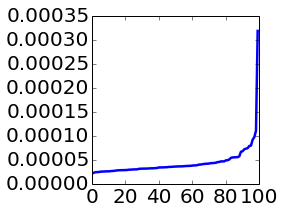

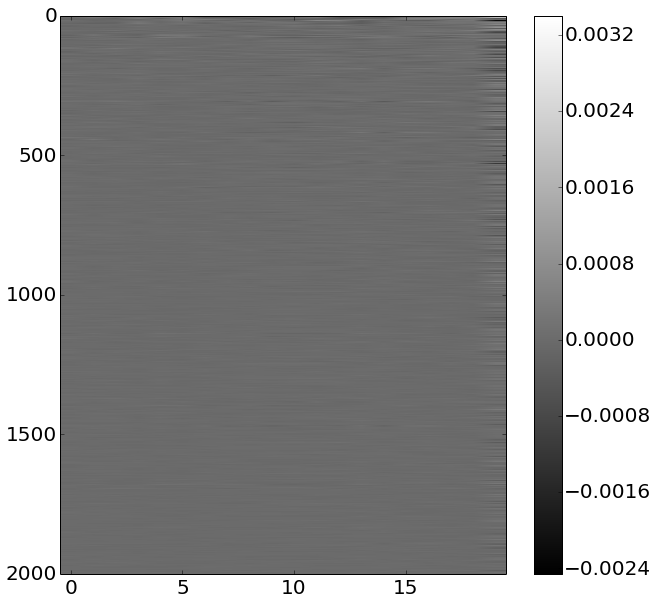

In [10]:
plt.figure(figsize=(3,3))
plt.plot(np.sort(jacob.std(0)))
idx = np.argsort(jacob.std(0))
sjacob = jacob[:,idx]
plt.figure(figsize=(10,10))
plt.imshow(sjacob[:,-20:],cmap='gray',aspect='auto')
plt.colorbar()

<h1><center>Dimensional Analysis</center></h1>

In [11]:
def wordIdx(words,vocab):
    if type(vocab) is not list:
        vocab = vocab.tolist()
    idxlist={}
    for w in words:
        idxlist[w] = None
        if w in vocab:
            idxlist[w] = vocab.index(w)
    return idxlist

In [12]:
#wordlist = ['space','nasa','lunar','orbit','shuttle','solar','launch','moon','satellite']
#wordlist = ['muslims','worship','belief','genocide','jews','islam','christianity','atheists','religious']
wordlist  = ['rsa','cryptography','crypto','keys','pgp','licence','secure','escrow','trust']
#wordlist = ['goals','pts','teams','league','team','players','nhl','stats','min']
#wordlist = ['bush','resources','charles','austin','bill','resolution','mr','misc','piece']

result   = wordIdx(wordlist,dataset['vocabulary'])
uniqdims = {}
for w in result:
    idx = result[w]
    if idx is None:
        continue
    print w,idx #Print word and idx in vocab
    word_grads = jacob[idx]
    sorted_dims= np.argsort(word_grads)
    for dim in sorted_dims[-5:].tolist():
        if dim not in uniqdims:
            uniqdims[dim] = 1
        else:
            uniqdims[dim]+= 1
    print np.sort(sorted_dims[-5:])

sorted_x = sorted(uniqdims.items(), key=operator.itemgetter(1))
print 'Most relevant dimensions (dim,count): ',sorted_x[-5:]

trust 815
[ 3 10 47 53 96]
cryptography 1418
[ 3 10 29 58 96]
keys 278
[10 12 55 62 96]
rsa 1531
[10 29 55 65 96]
crypto 1311
[10 29 55 65 96]
pgp 989
[10 29 55 65 96]
escrow 805
[ 3 10 16 55 96]
secure 672
[ 3 10 16 55 96]
Most relevant dimensions (dim,count):  [(3, 4), (29, 4), (55, 6), (96, 8), (10, 8)]


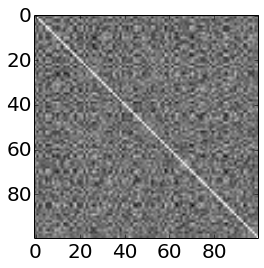

In [13]:
plt.imshow(np.corrcoef(jacob.T),cmap='gray')

In [14]:
from sklearn import cluster

[0 1 2 3 4 5 6 7 8 9]


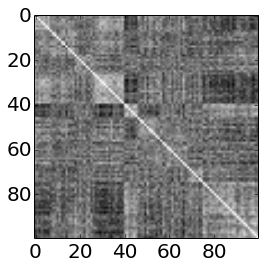

In [15]:
K = 10
spectral = cluster.SpectralClustering(n_clusters=K, eigen_solver='arpack',affinity="nearest_neighbors")
aggclust = cluster.AgglomerativeClustering(n_clusters=K, affinity='cosine',linkage='average')
affinity_propagation = cluster.AffinityPropagation(damping=.9, preference=-30)

algorithm = spectral
algorithm.fit(jacob.T)
if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)
    

idx_cluster = np.argsort(y_pred)
print np.unique(y_pred)
jacob_perm  = jacob[:,idx_cluster]
plt.imshow(np.corrcoef(jacob_perm.T),cmap='gray')

In [26]:
idx_label_pairs = zip(np.arange(len(y_pred)),y_pred)
idx_label_pairs.sort(key=lambda a: a[1])
print 'Sorted dim_idx/label pairs',idx_label_pairs
cluster_viz = OrderedDict()
for k in np.unique(y_pred):
    idxlist = []
    for idx,lab in idx_label_pairs:
        if lab==k:
            idxlist.append(idx)
    print k,idxlist
    z_start = np.zeros((1,vae.params['dim_stochastic']))
    z_end   = np.zeros((1,vae.params['dim_stochastic']))
    z_start[:,idxlist] = -1
    z_end[:,idxlist] = 1
    cluster_viz[k] = OrderedDict()
    for alpha in np.linspace(0,1,10):
        z_effective = z_start*alpha + (1.-alpha)*z_end
        recons = [dataset['vocabulary'][w_idx] for w_idx in np.argsort(vae.reconstruct(z_effective.astype('float32')).squeeze())[-5:]]
        cluster_viz[k][alpha] = recons
    print 'Done'

Sorted dim_idx/label pairs [(0, 0), (33, 0), (63, 0), (74, 0), (78, 0), (91, 0), (2, 1), (10, 1), (26, 1), (27, 1), (31, 1), (37, 1), (38, 1), (45, 1), (54, 1), (55, 1), (68, 1), (11, 2), (29, 2), (47, 2), (70, 2), (71, 2), (77, 2), (81, 2), (85, 2), (87, 2), (8, 3), (18, 3), (23, 3), (36, 3), (41, 3), (43, 3), (56, 3), (82, 3), (90, 3), (99, 3), (73, 4), (86, 4), (88, 4), (89, 4), (1, 5), (5, 5), (13, 5), (19, 5), (30, 5), (35, 5), (39, 5), (48, 5), (52, 5), (58, 5), (59, 5), (64, 5), (66, 5), (75, 5), (79, 5), (83, 5), (84, 5), (92, 5), (98, 5), (3, 6), (6, 6), (7, 6), (9, 6), (12, 6), (14, 6), (15, 6), (16, 6), (17, 6), (20, 6), (22, 6), (24, 6), (25, 6), (28, 6), (32, 6), (34, 6), (40, 6), (42, 6), (44, 6), (46, 6), (50, 6), (53, 6), (57, 6), (60, 6), (62, 6), (65, 6), (67, 6), (69, 6), (80, 6), (93, 6), (94, 6), (95, 6), (96, 6), (4, 7), (21, 7), (49, 7), (51, 7), (61, 7), (72, 7), (76, 7), (97, 7)]
0 [0, 33, 63, 74, 78, 91]
Done
1 [2, 10, 26, 27, 31, 37, 38, 45, 54, 55, 68]
Done


In [27]:
for k in cluster_viz:
    print 'Cluster: ',k
    word_slider = cluster_viz[k]
    for alpha in word_slider:
        print alpha,word_slider[alpha]

Cluster:  0
0.0 ['people', 'apr', 'don', 'article', 'writes']
0.111111111111 ['people', 'apr', 'don', 'article', 'writes']
0.222222222222 ['people', 'apr', 'don', 'article', 'writes']
0.333333333333 ['people', 'apr', 'don', 'article', 'writes']
0.444444444444 ['good', 'apr', 'don', 'article', 'writes']
0.555555555556 ['good', 'apr', 'don', 'article', 'writes']
0.666666666667 ['good', 'apr', 'don', 'article', 'writes']
0.777777777778 ['good', 'apr', 'don', 'article', 'writes']
0.888888888889 ['apr', 'good', 'don', 'article', 'writes']
1.0 ['apr', 'good', 'don', 'article', 'writes']
Cluster:  1
0.0 ['apr', 'good', 'don', 'article', 'writes']
0.111111111111 ['good', 'apr', 'don', 'article', 'writes']
0.222222222222 ['good', 'apr', 'don', 'article', 'writes']
0.333333333333 ['good', 'apr', 'don', 'article', 'writes']
0.444444444444 ['good', 'apr', 'don', 'article', 'writes']
0.555555555556 ['good', 'apr', 'don', 'article', 'writes']
0.666666666667 ['good', 'apr', 'don', 'article', 'writes'

[0 1 2 3 4 5 6 7]


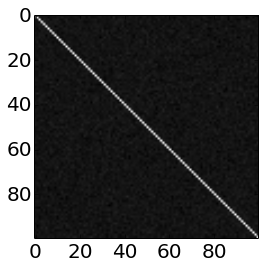

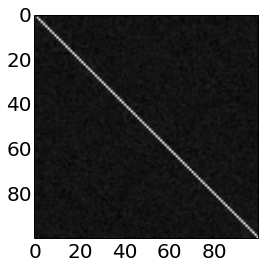

In [25]:
#Visualizing random independant gaussian noise for reference
K = 8
RAND     = np.random.randn(2000,100)
plt.figure()
plt.imshow(np.corrcoef(RAND.T),cmap='gray')
spectral = cluster.SpectralClustering(n_clusters=K, eigen_solver='arpack',affinity="nearest_neighbors")
aggclust = cluster.AgglomerativeClustering(n_clusters=K, affinity='cosine',linkage='average')
affinity_propagation = cluster.AffinityPropagation(damping=.9, preference=-30)

algorithm = spectral
algorithm.fit(RAND.T)
if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)
idx_cluster = np.argsort(y_pred)
print np.unique(y_pred)
RAND_perm  = RAND[:,idx_cluster]
plt.figure()
plt.imshow(np.corrcoef(RAND_perm.T),cmap='gray')

<h1><center>Word Similarity and Clustering Words</center></h1>

In [19]:
from sklearn.metrics.pairwise import pairwise_distances
dist_mat = pairwise_distances(jacob)

In [20]:
wordlist_similar = ['weapons','medical','companies','define','israel','book']
word_idx = wordIdx(wordlist_similar,dataset['vocabulary'])
for w in word_idx:
    idx    = word_idx[w]
    print 'Word: ',w,',  Close by: ',[dataset['vocabulary'][k] for k in np.argsort(dist_mat[idx])[:7]]

Word:  israel ,  Close by:  ['israel', 'jews', 'historical', 'sexual', 'countries', 'sex', 'culture']
Word:  medical ,  Close by:  ['medical', 'medicine', 'treatment', 'harvard', 'doctor', 'study', 'disease']
Word:  companies ,  Close by:  ['companies', 'expensive', 'prices', 'market', 'models', 'products', 'digital']
Word:  weapons ,  Close by:  ['weapons', 'fbi', 'waco', 'allowed', 'crime', 'guilty', 'federal']
Word:  book ,  Close by:  ['book', 'books', 'reference', 'guide', 'page', 'image', 'library']
Word:  define ,  Close by:  ['define', 'definition', 'defined', 'instance', 'arguments', 'morality', 'refer']


In [21]:
#Cluster the words based on the representation in the Jacobian
K = 10
spectral = cluster.SpectralClustering(n_clusters=K, eigen_solver='arpack',affinity="nearest_neighbors")
algorithm = spectral
algorithm.fit(jacob)
if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)

In [22]:
for k in np.unique(y_pred):
    print 'Cluster: ',k,','.join([dataset['vocabulary'][idx] for idx in np.where(y_pred==k)[0]]),'\n\n'

Cluster:  0 ax,st,win,home,cc,di,april,cx,area,washington,al,wm,air,toronto,um,canada,la,front,york,san,road,division,dave,tv,total,series,east,ey,lk,report,colorado,gm,base,scott,ww,tom,chicago,ql,sl,west,dc,pick,thomas,blue,room,mq,ny,qs,mw,fi,north,mk,pa,pittsburgh,mi,george,south,california,watch,month,hours,range,mv,eric,trade,sc,western,uw,em,boston,conference,mt,regular,cb,joe,round,miles,wt,march,doug,ck,los,columbia,pm,mu,nj,auto,gary,ai,bh,vancouver,acs,mf,ron,nec,pts,mm,dy,master,mg,green,km,bc,roger,cwru,detroit,jeff,quick,qq,ken,fully,angeles,mx,brown,ss,ice,rob,sq,andy,star,wings,buffalo,hr,si,beat,summer,du,kent,radar,navy,charles,heavy,stephen,hall,ne,lee,joseph,montreal,gt,po,lj,gatech,ra,released,leafs,cal,cleveland,jack,jason,piece,fun,edge,br,georgia,waiting,mon,uh,utexas,philadelphia,mp,tg,drop,jose,louis,ti,solid,greg,bmw,owner,craig,pt,ml,shots,yesterday,flyers,va,moved,col,announced,jr,mcgill,older,chi,gmt,te,ez,tx,seattle,spot,alan,park,sj,kings,zone,canadian,m